In [2]:
import io
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [15]:
rope_type = 'yellow'
pcds = np.load(f'/root/real2sim/real2sim/real_points/{rope_type}/real_pcds.npy', allow_pickle=True)
with open('/root/ExPCP/policy/pbm/experts/Move_1000_8000_1000_8000_500_2000/Move-v1/expert_0.0000_13:01:00.pickle', 'rb') as f:
    pcds_sim = pickle.load(f)['plasticine_pc']

In [12]:
modify_pcds_list = []
for pcd in pcds:
    if pcd.shape[0] < 1000:
        modify_pcds_list.append(pcd)
        bf_pcd = pcd
    else:
        modify_pcds_list.append(bf_pcd)
pcds = modify_pcds_list

/tmp/ipykernel_2358832/2906903708.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/tmp/ipykernel_2358832/2906903708.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  output_pcds = np.array(output_pcds)


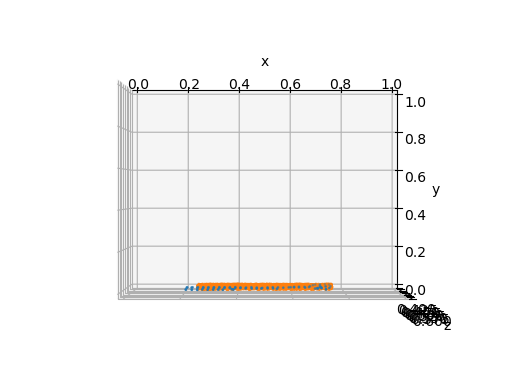

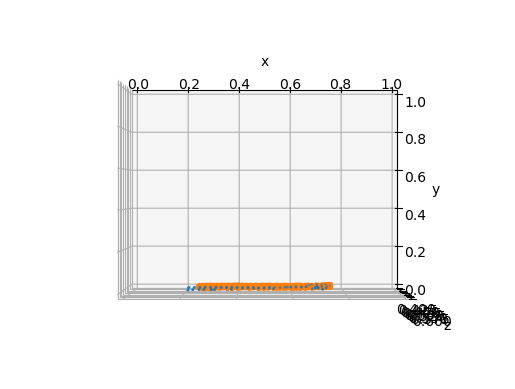

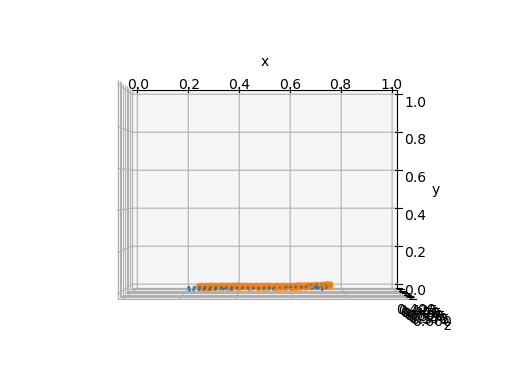

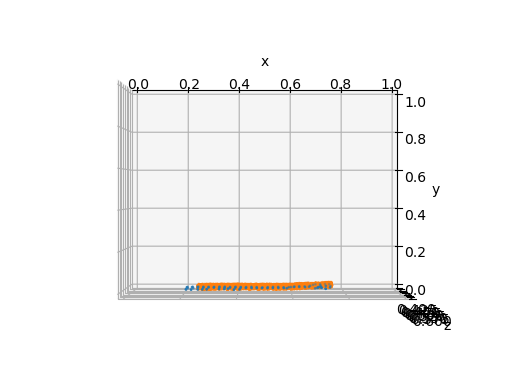

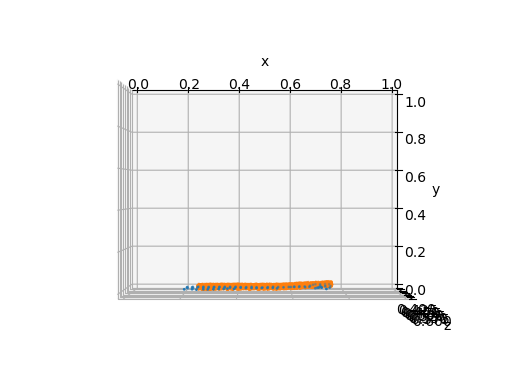

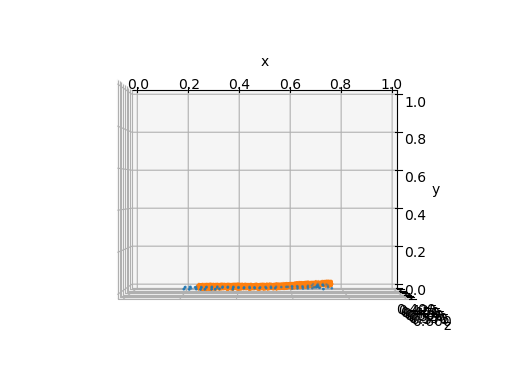

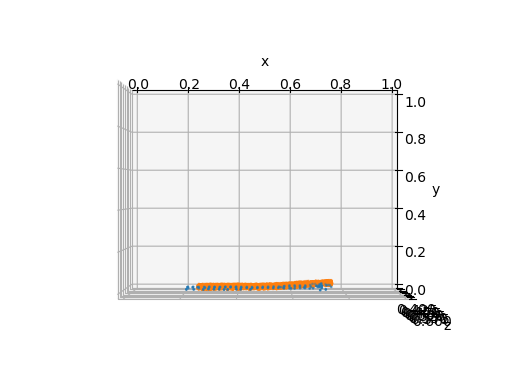

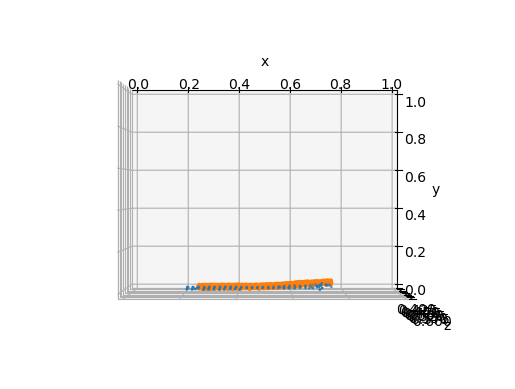

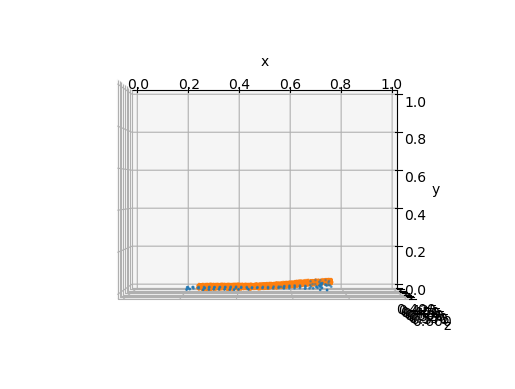

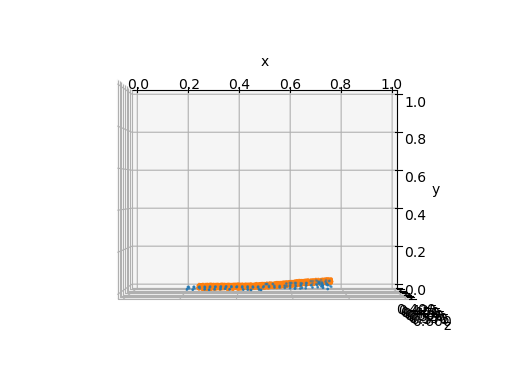

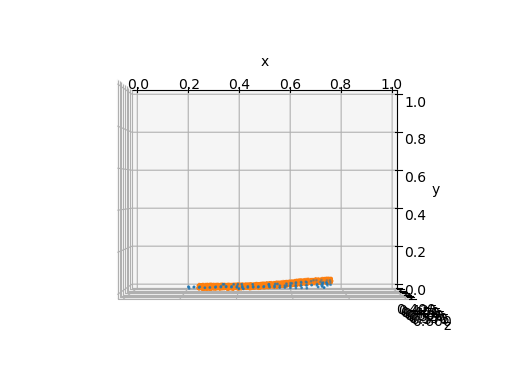

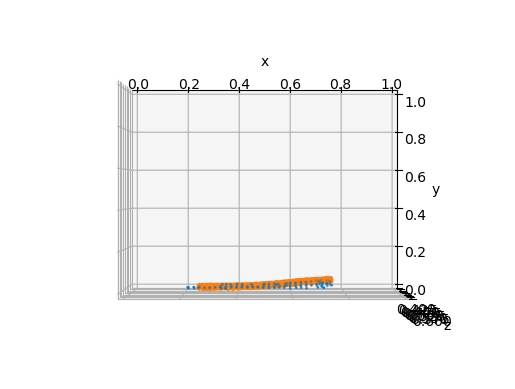

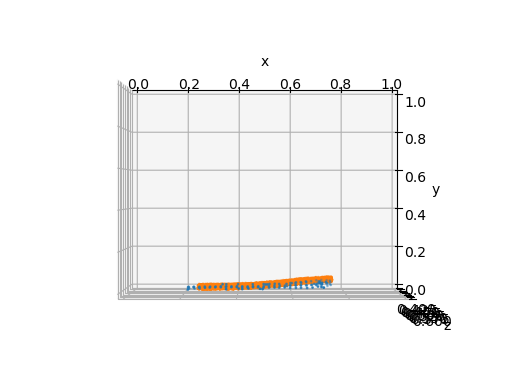

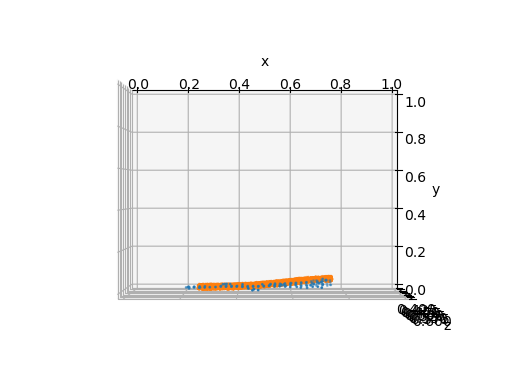

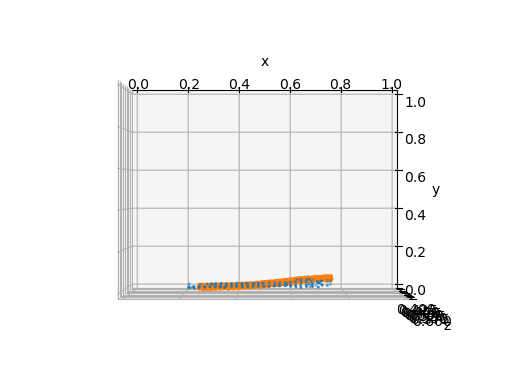

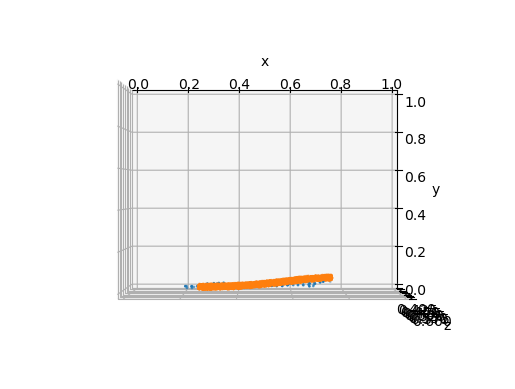

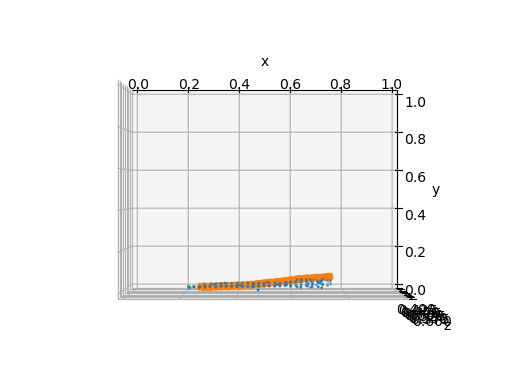

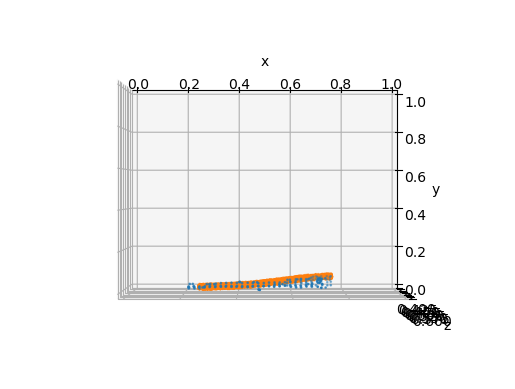

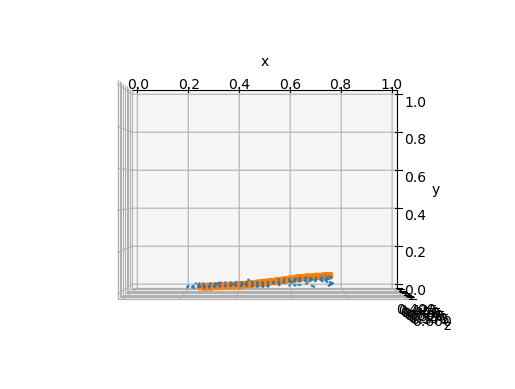

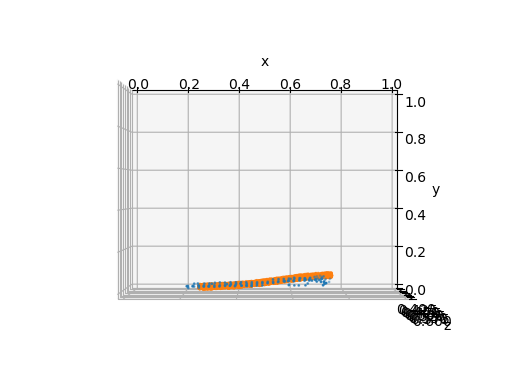

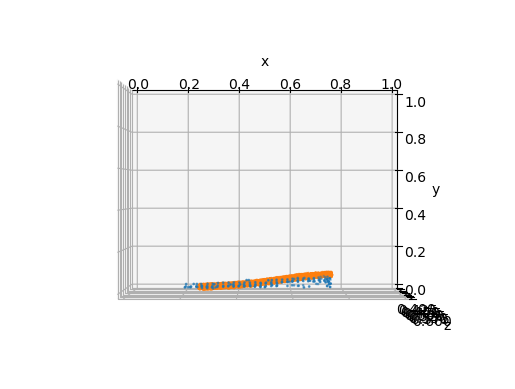

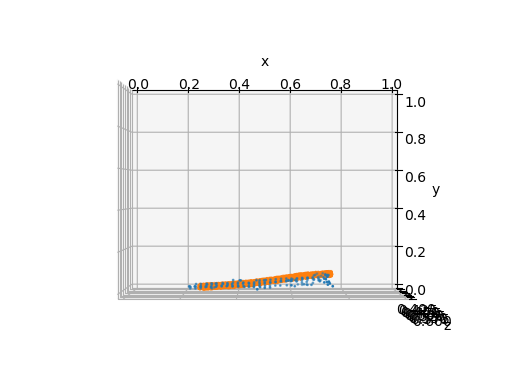

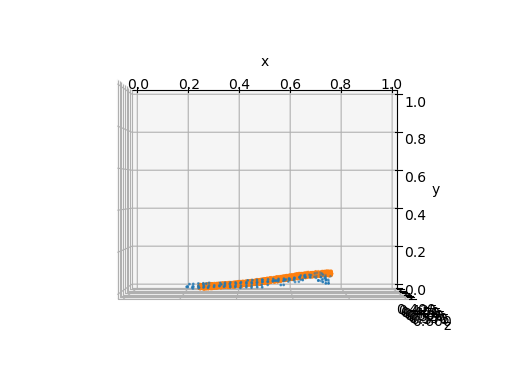

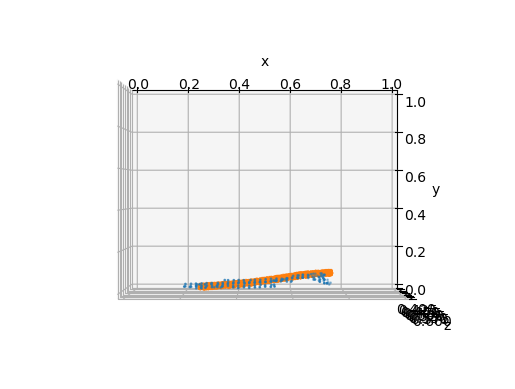

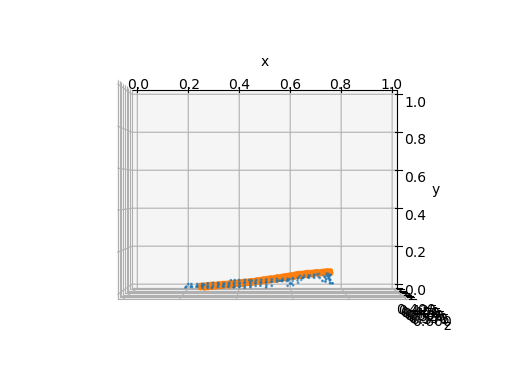

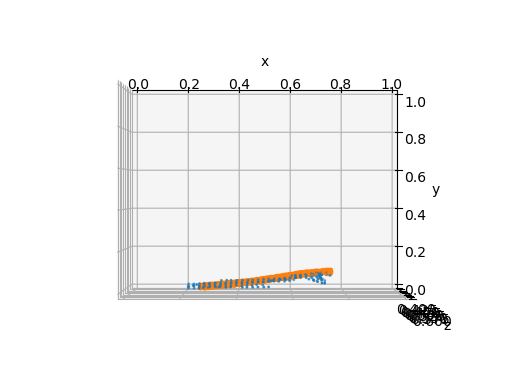

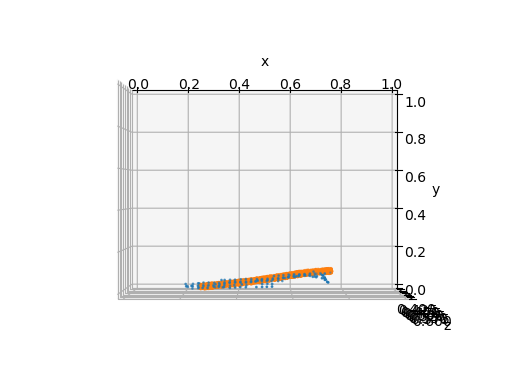

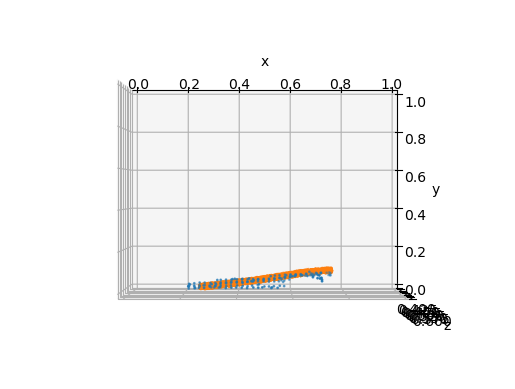

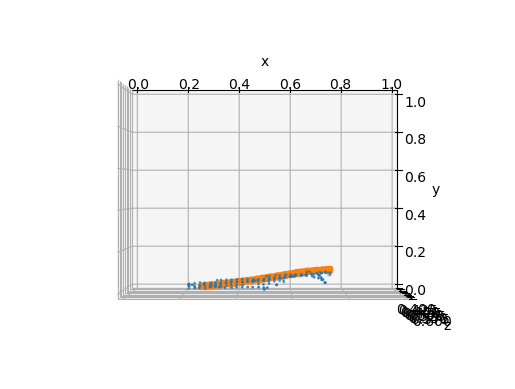

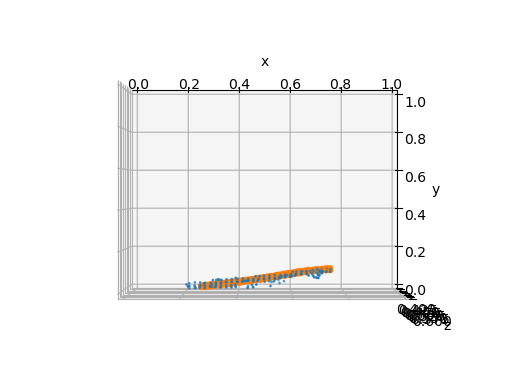

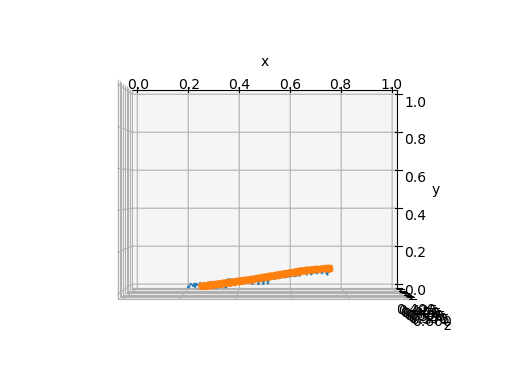

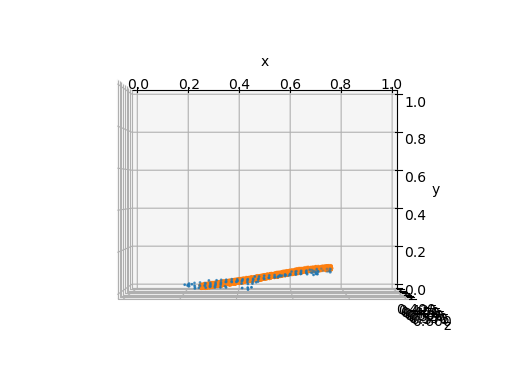

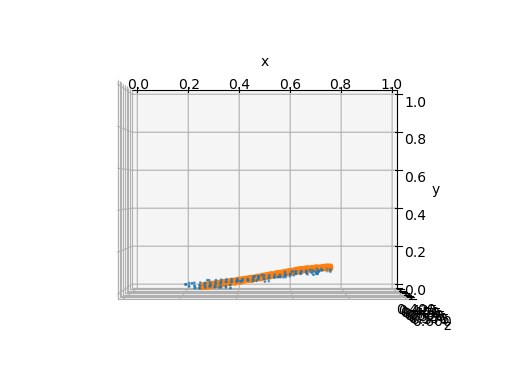

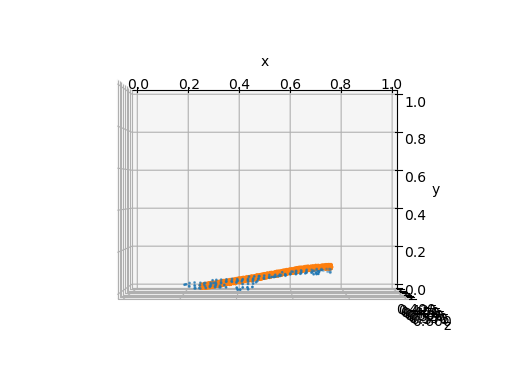

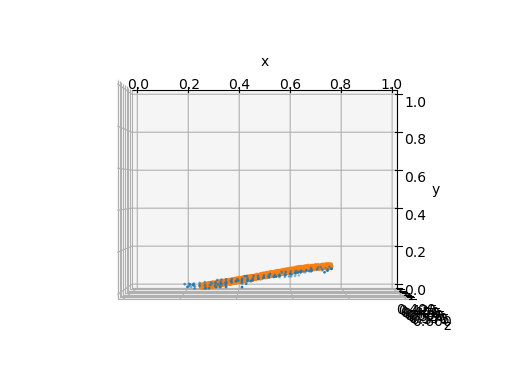

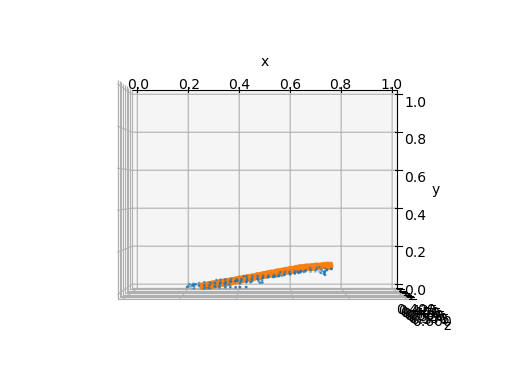

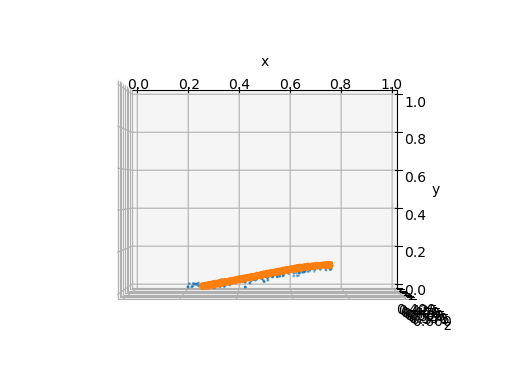

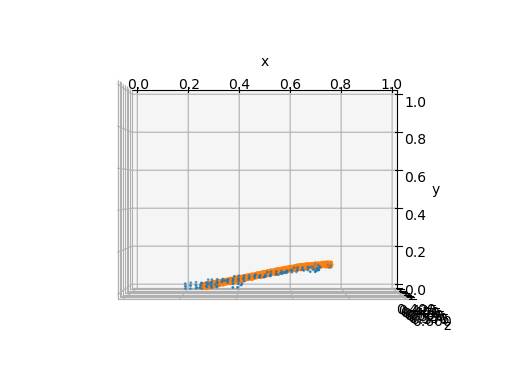

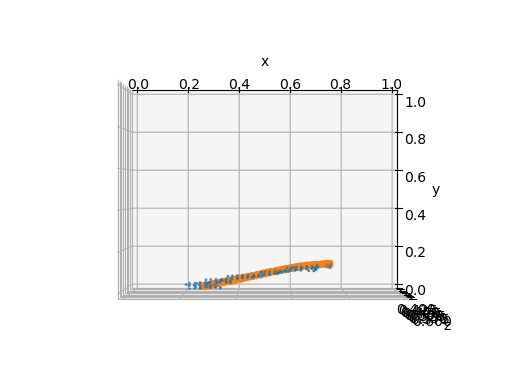

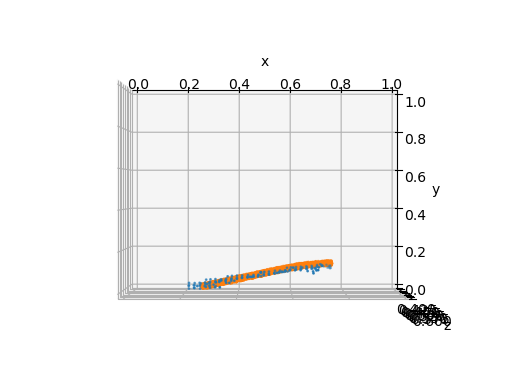

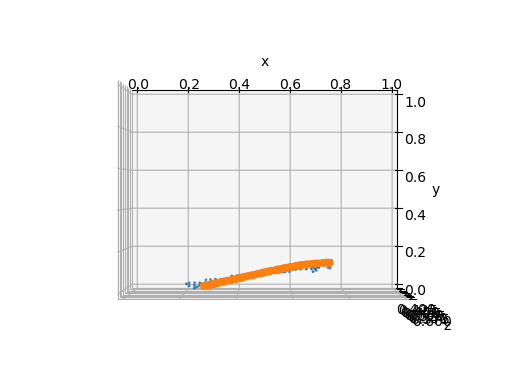

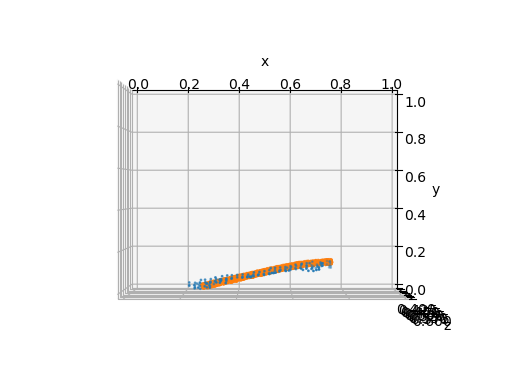

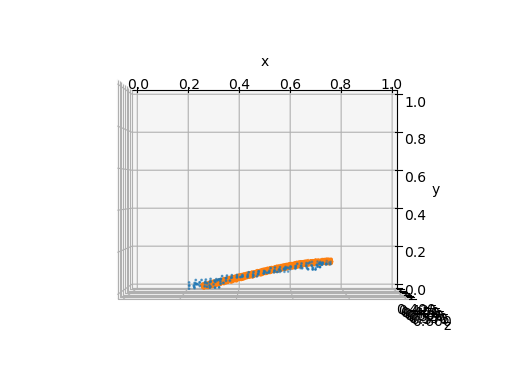

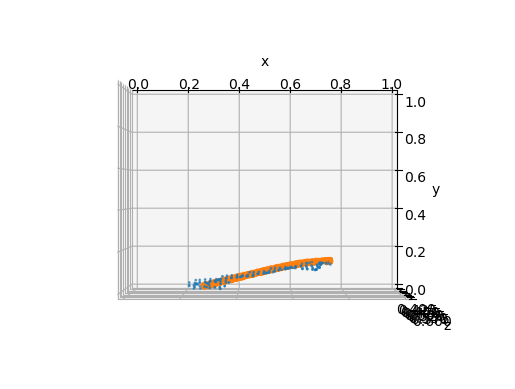

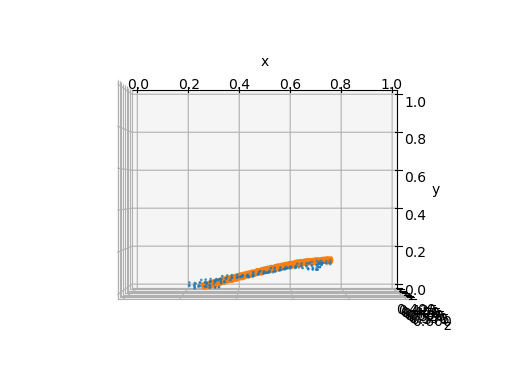

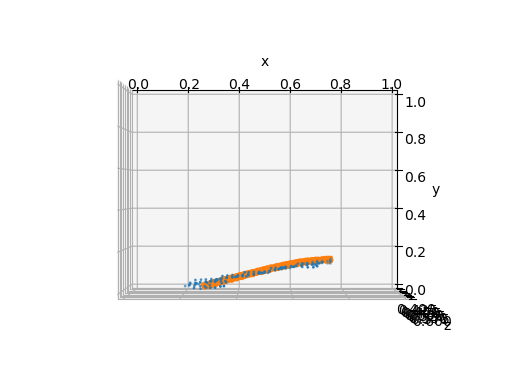

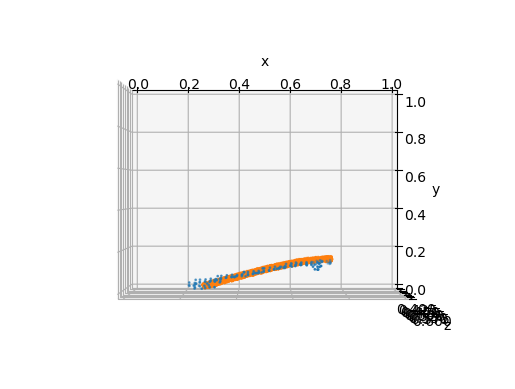

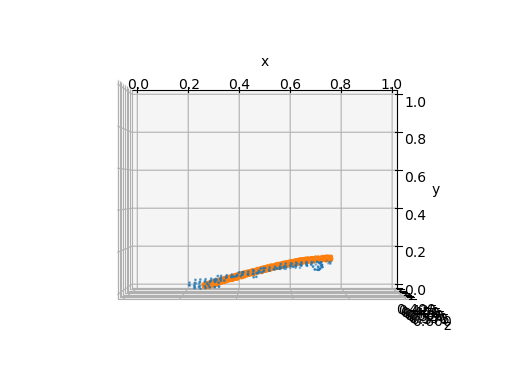

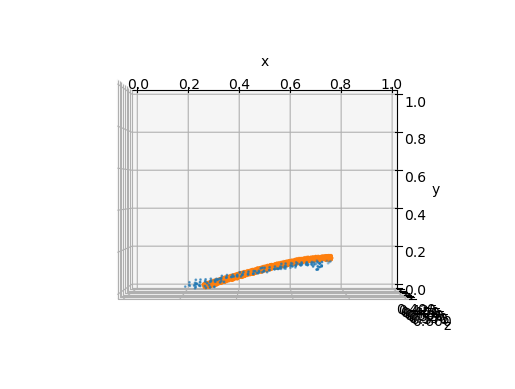

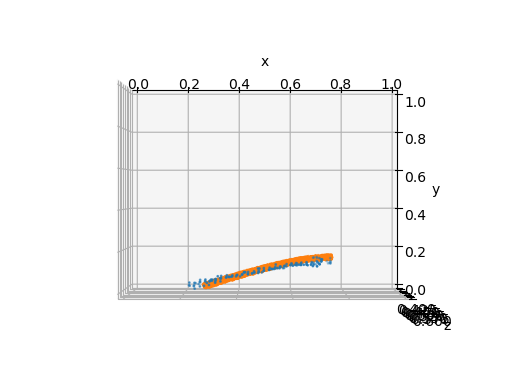

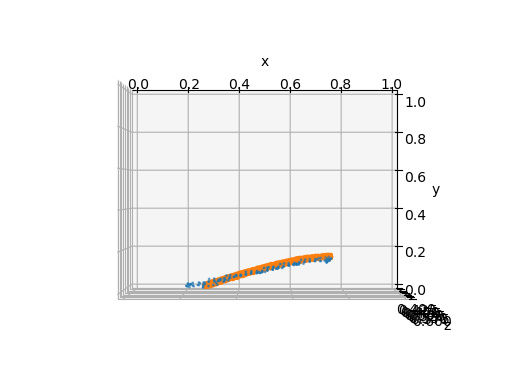

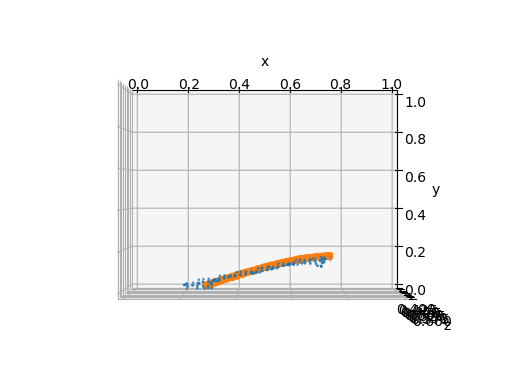

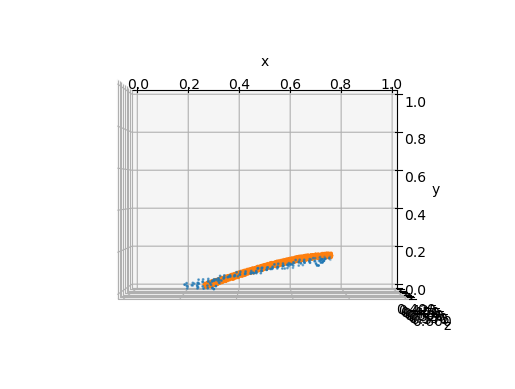

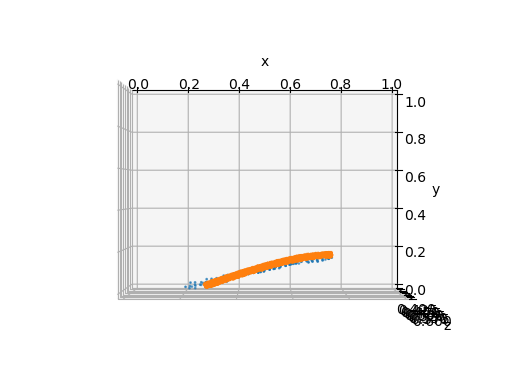

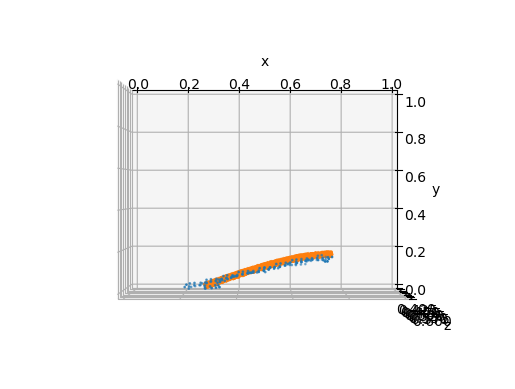

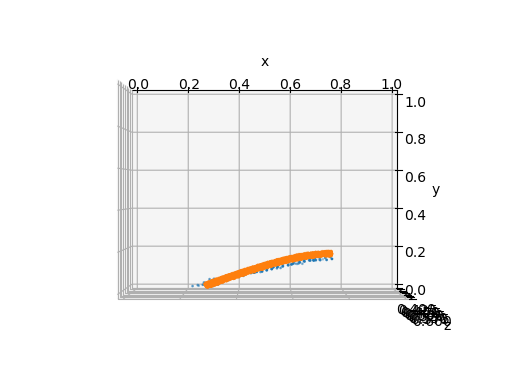

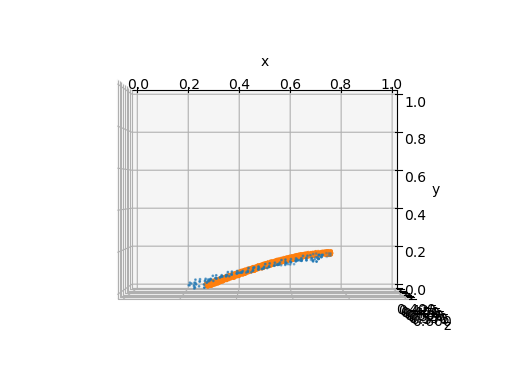

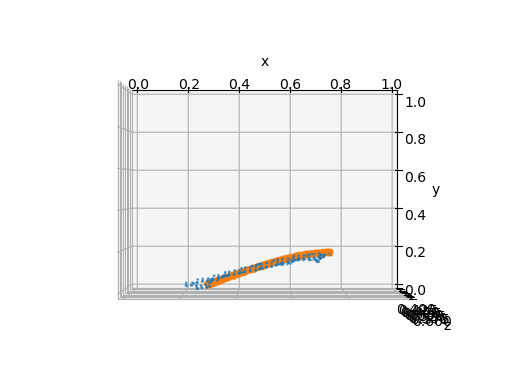

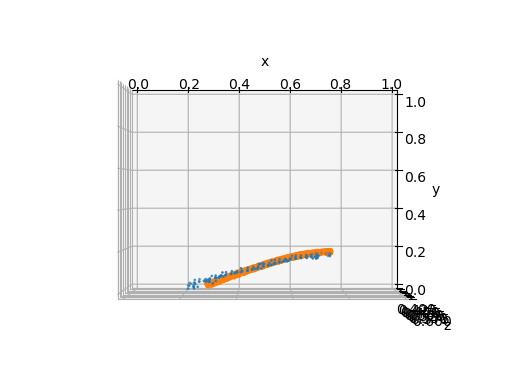

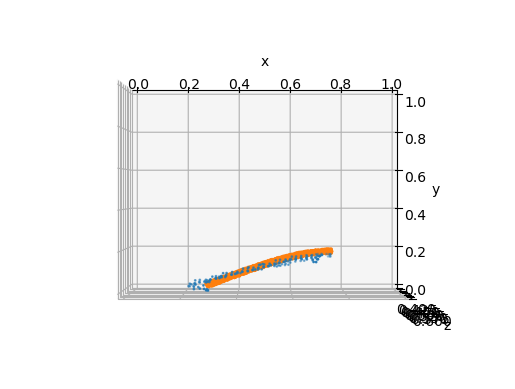

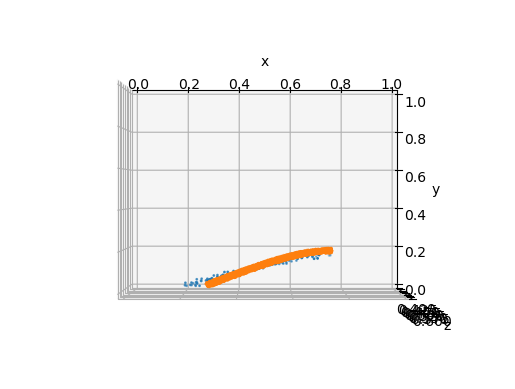

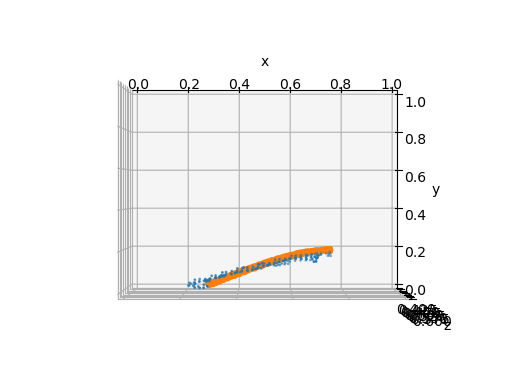

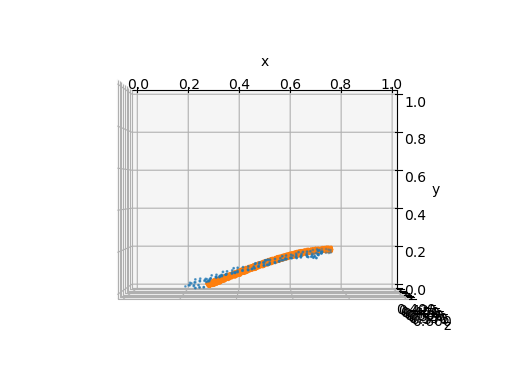

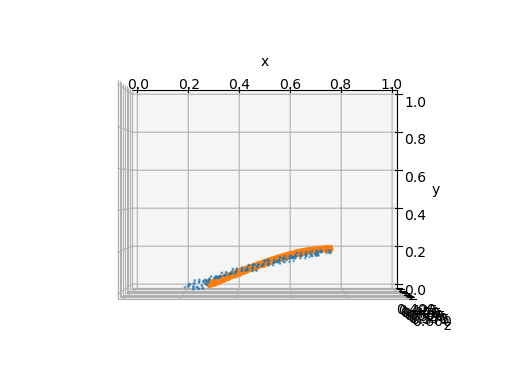

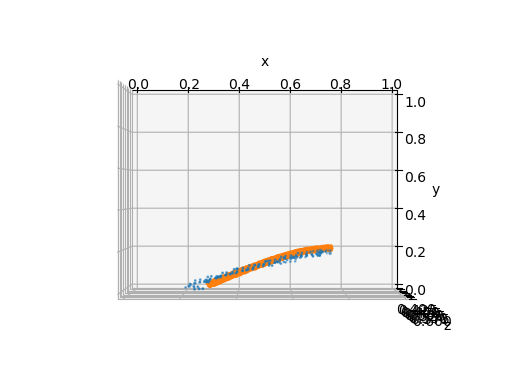

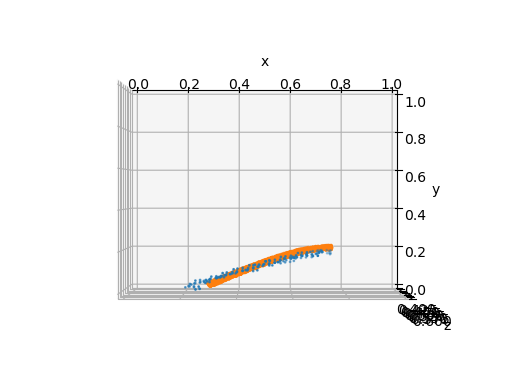

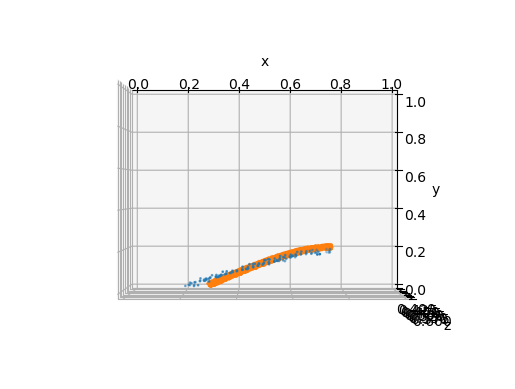

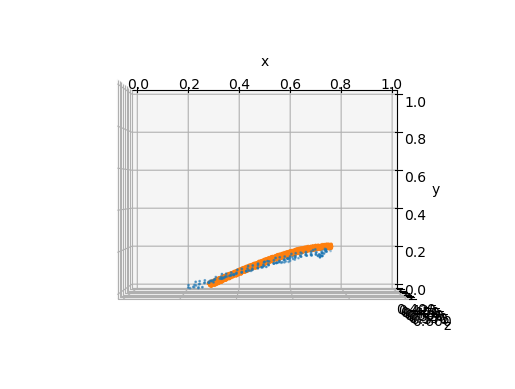

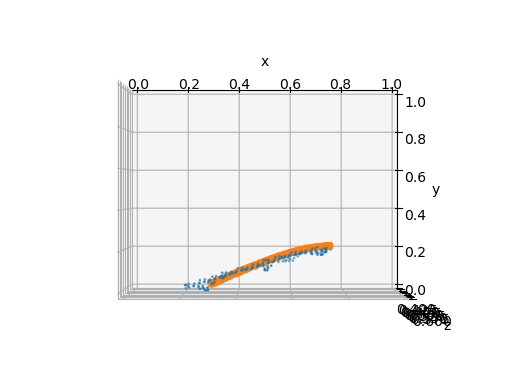

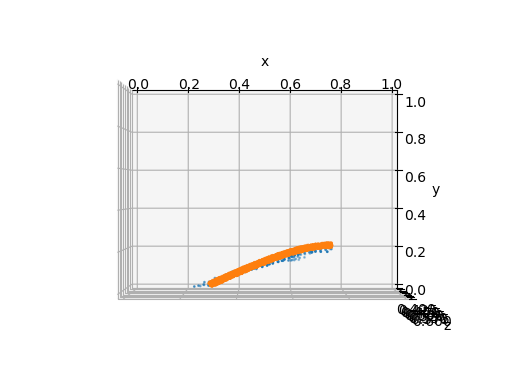

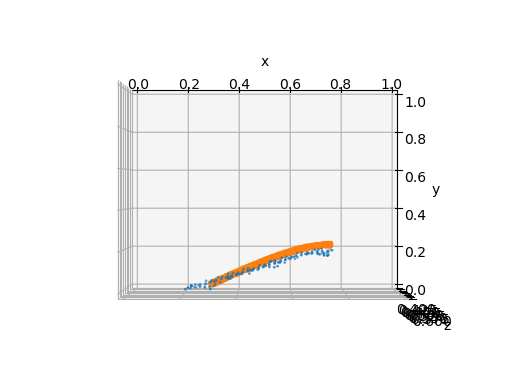

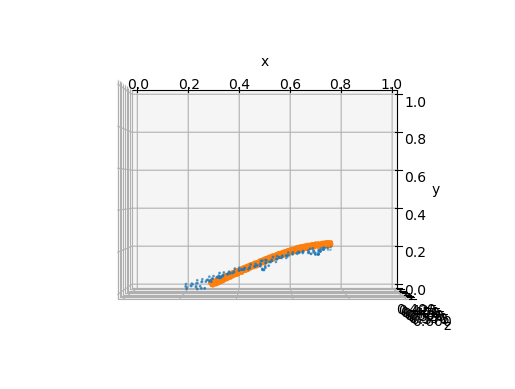

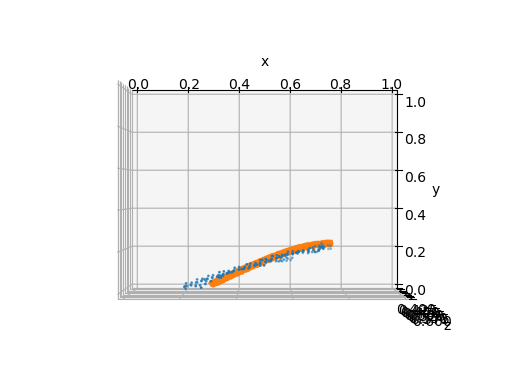

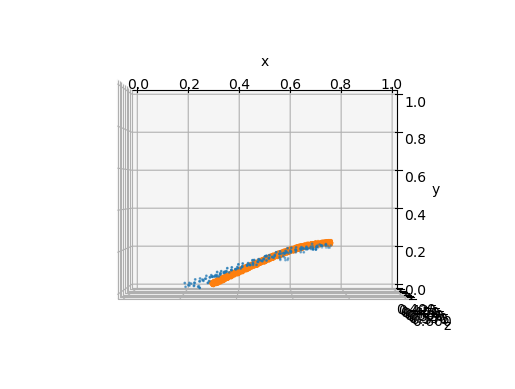

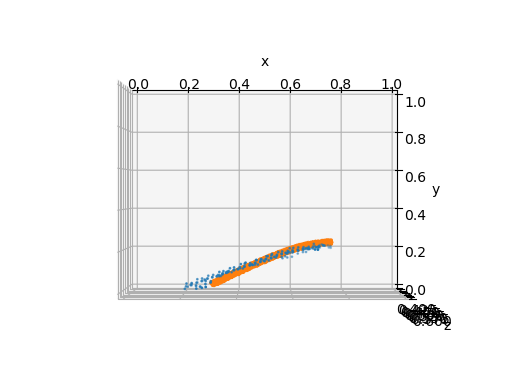

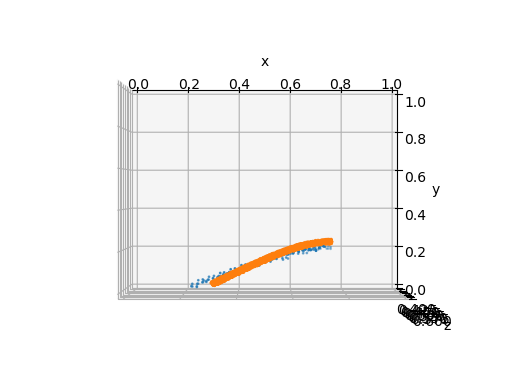

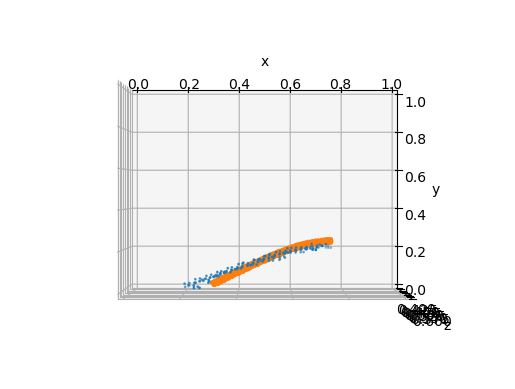

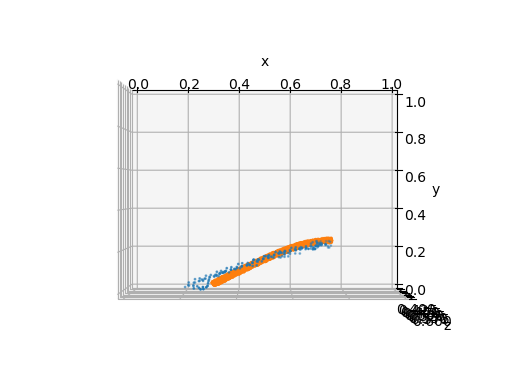

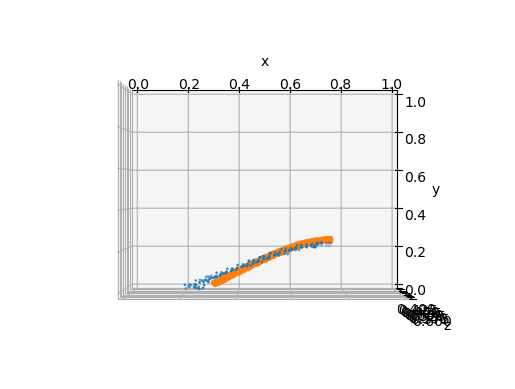

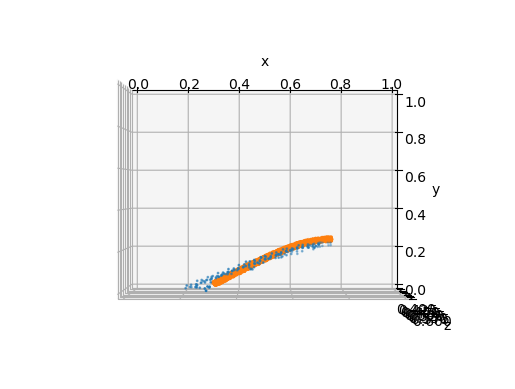

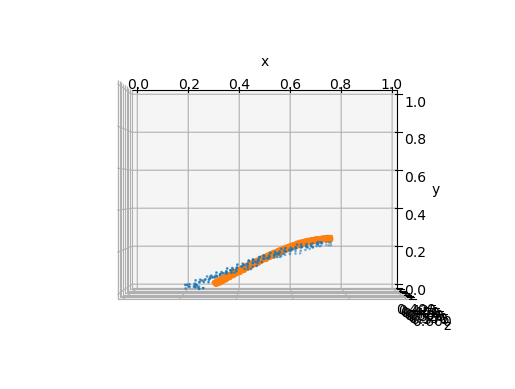

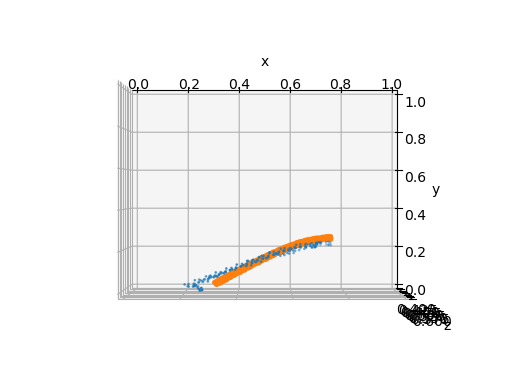

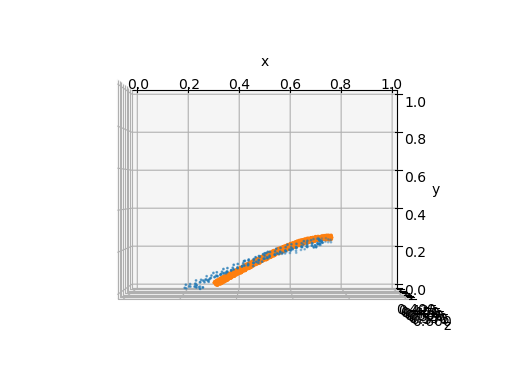

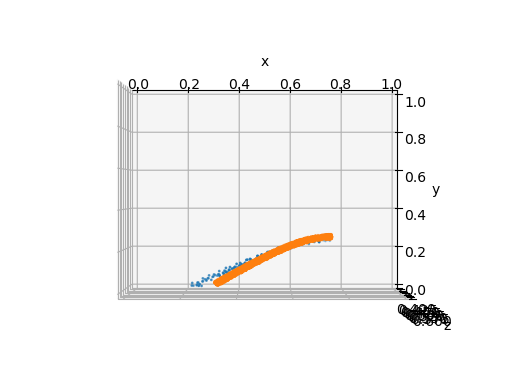

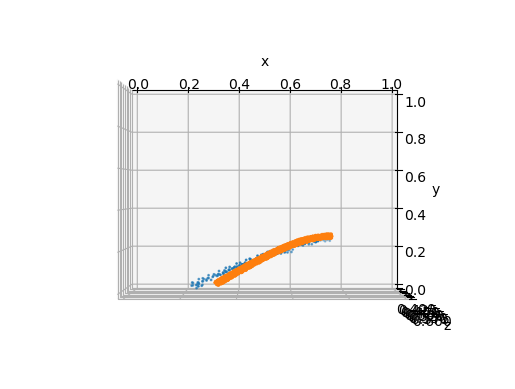

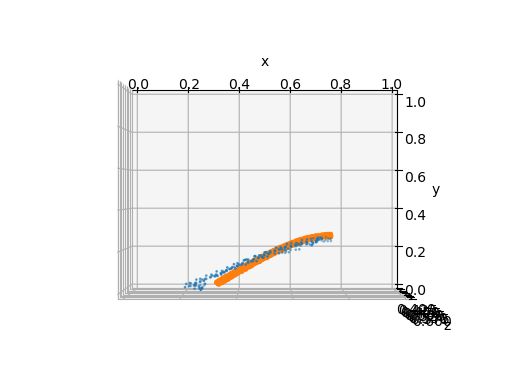

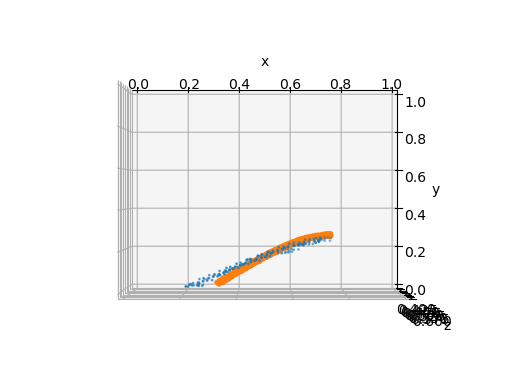

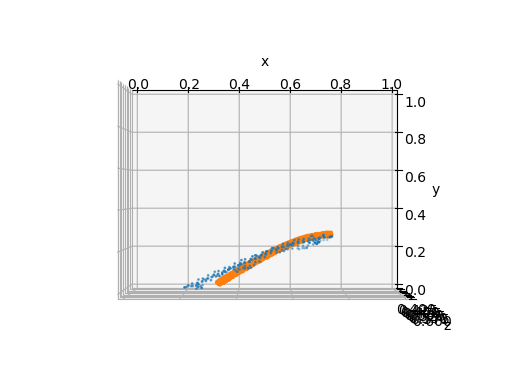

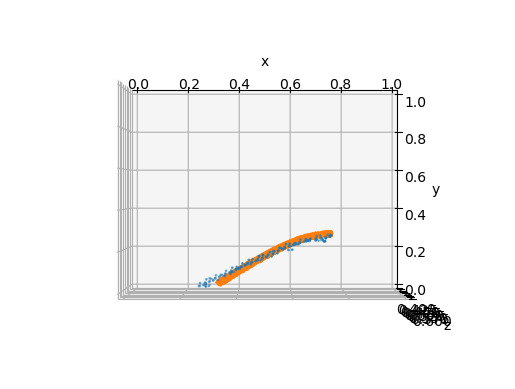

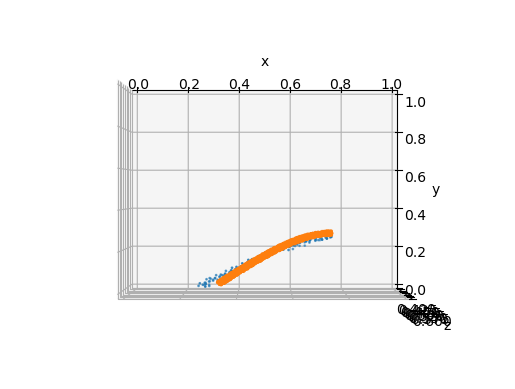

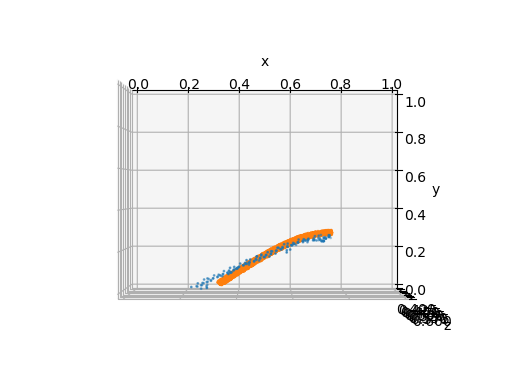

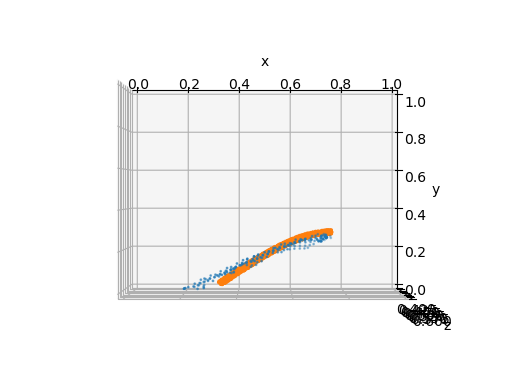

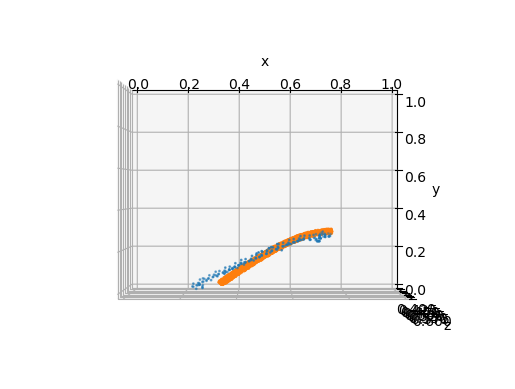

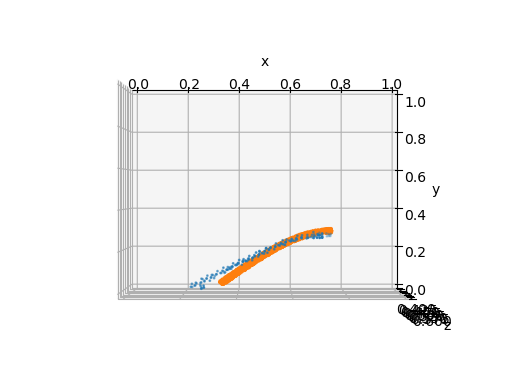

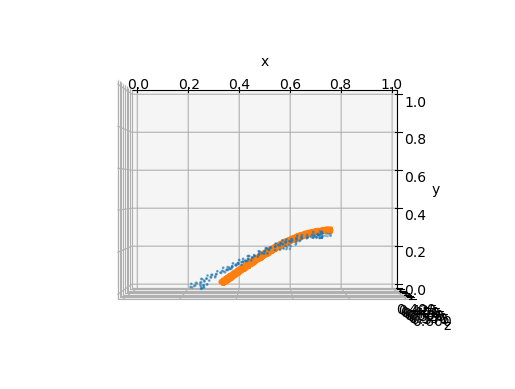

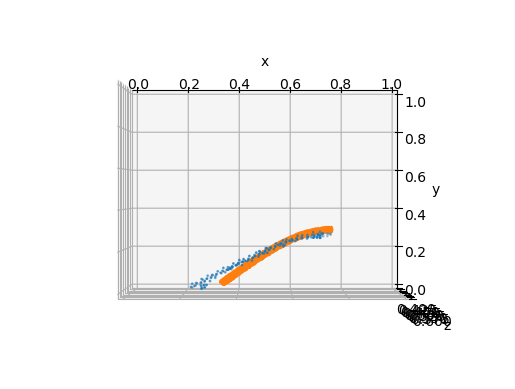

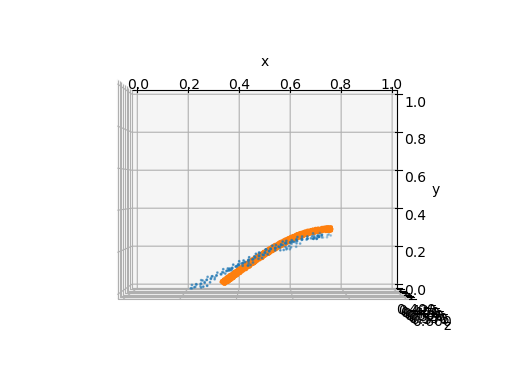

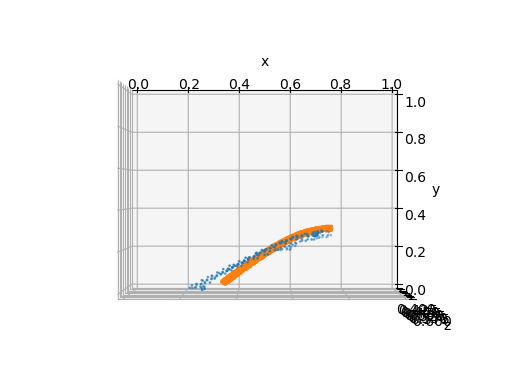

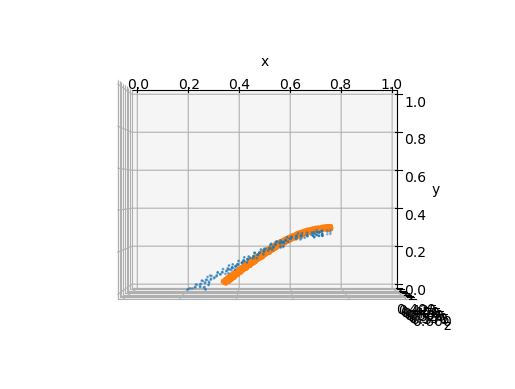

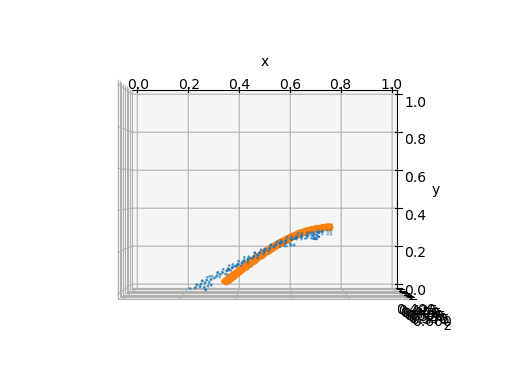

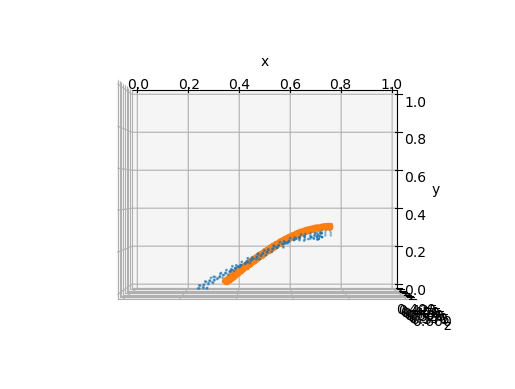

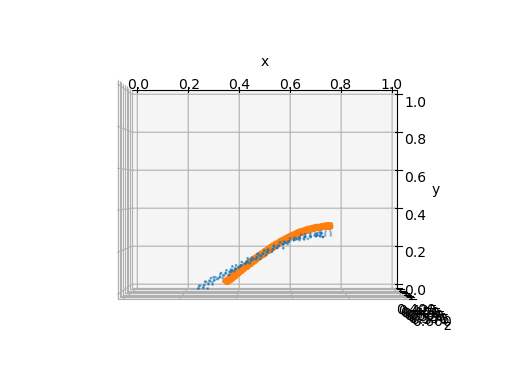

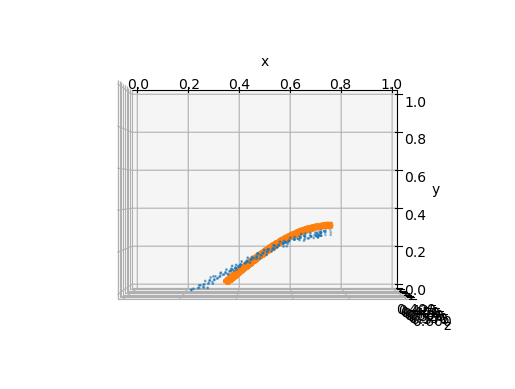

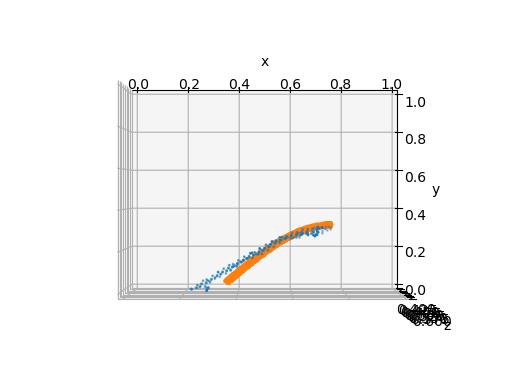

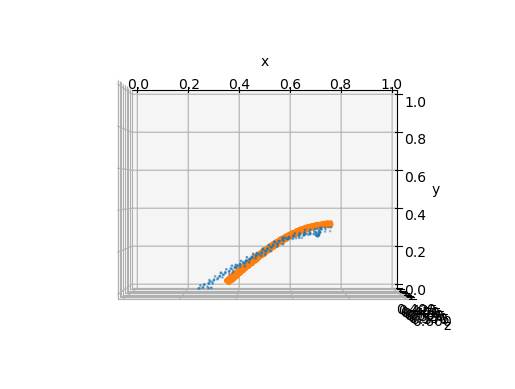

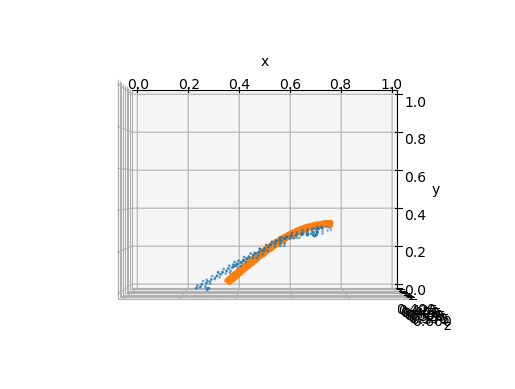

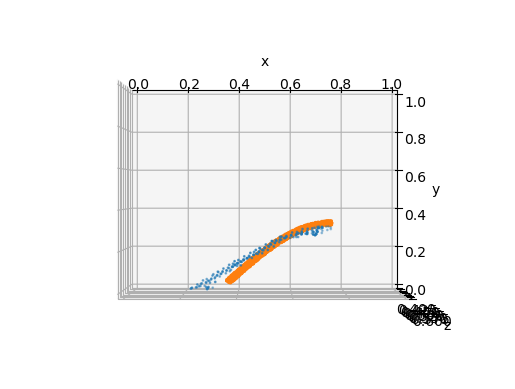

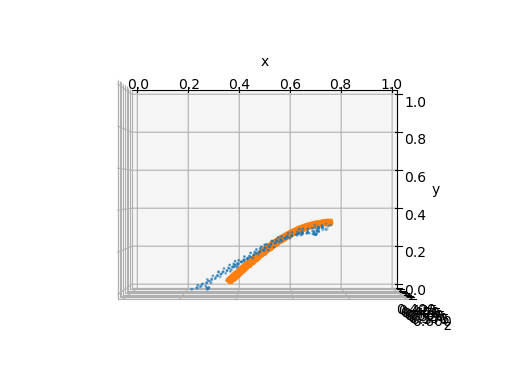

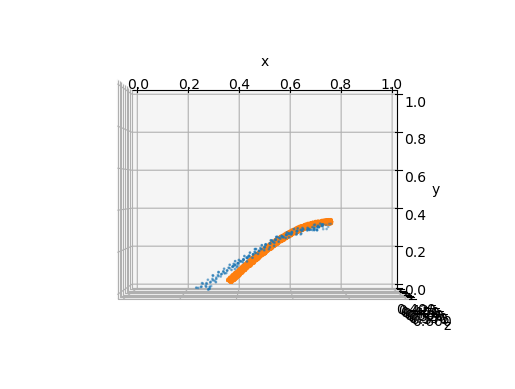

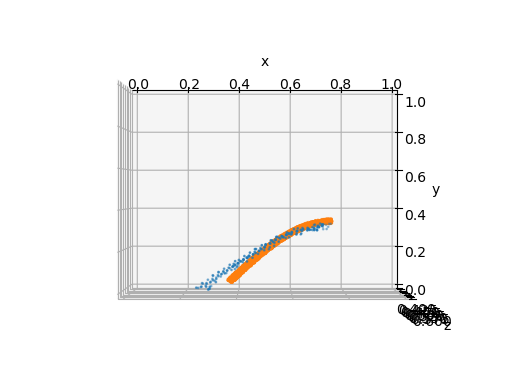

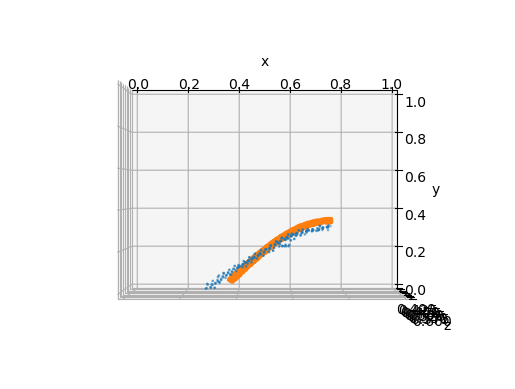

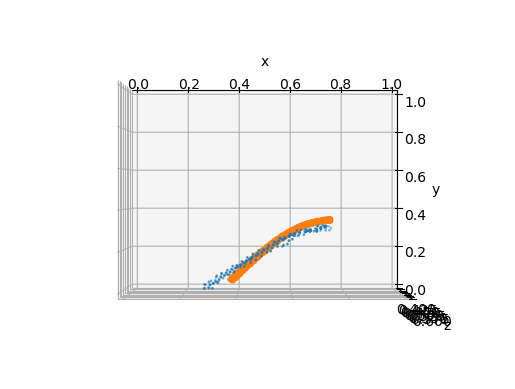

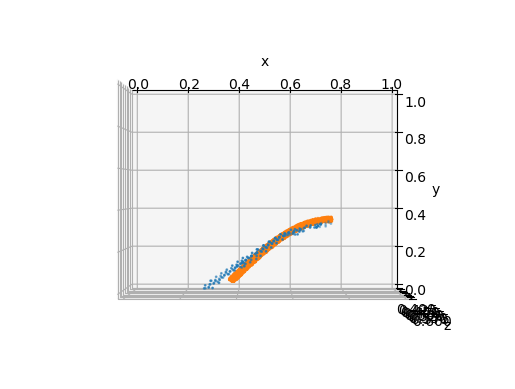

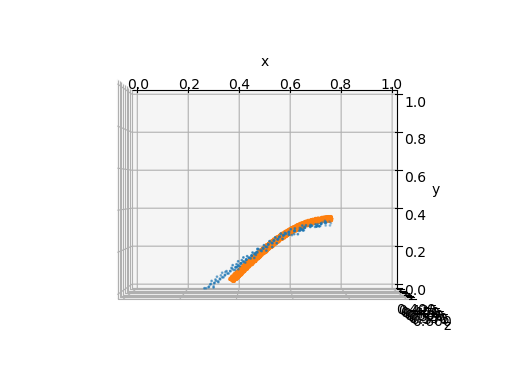

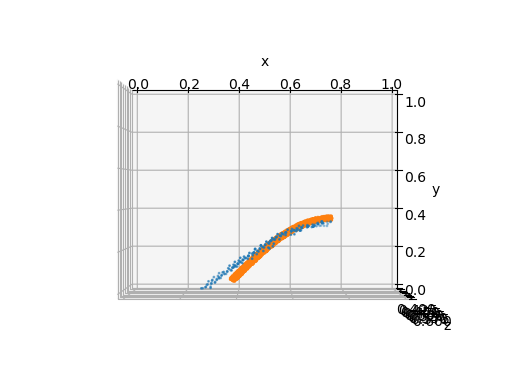

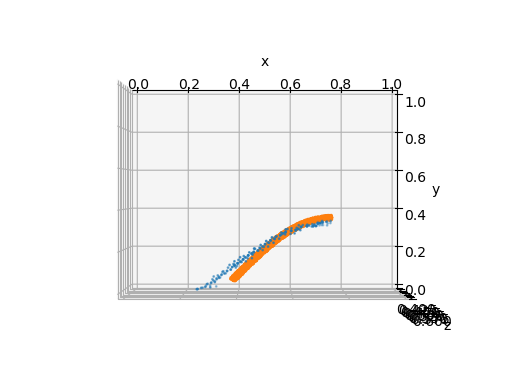

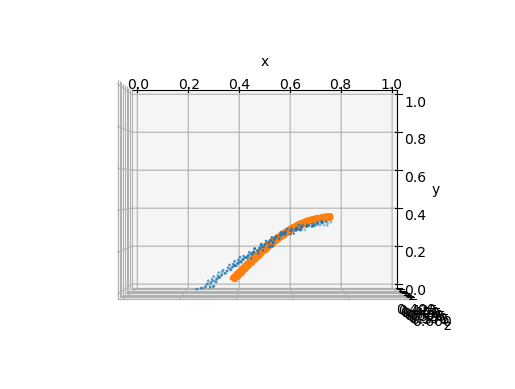

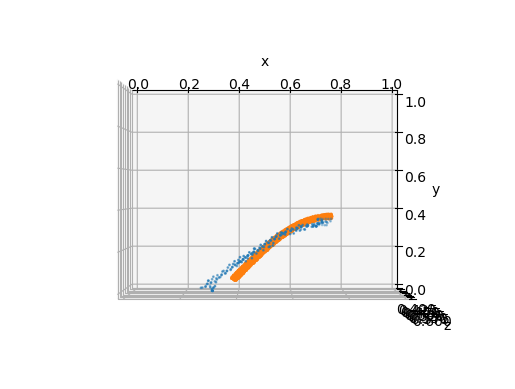

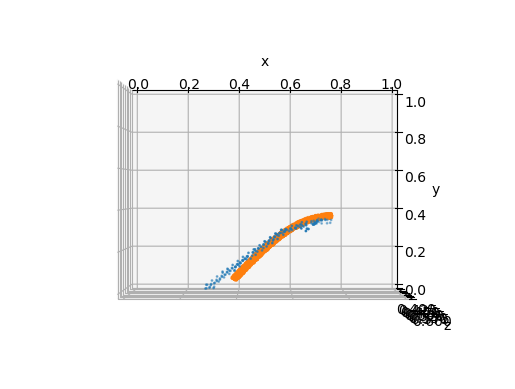

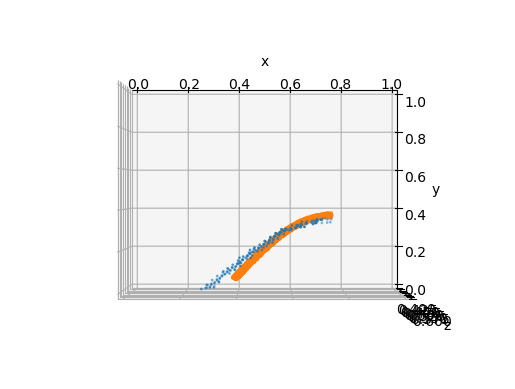

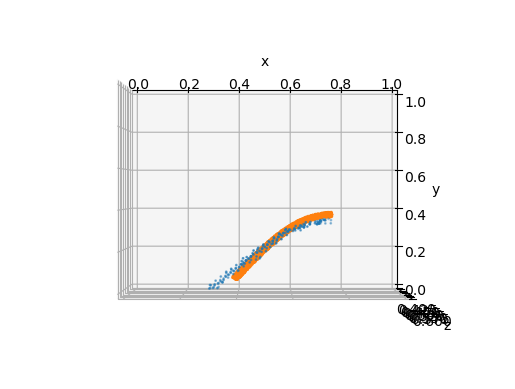

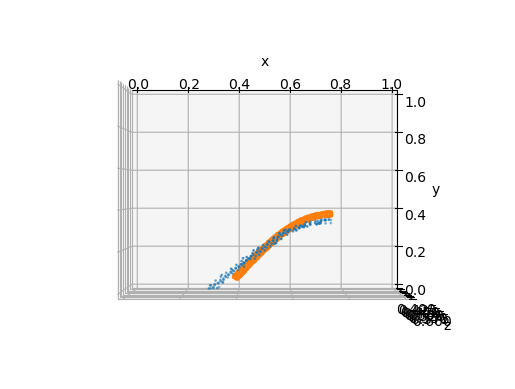

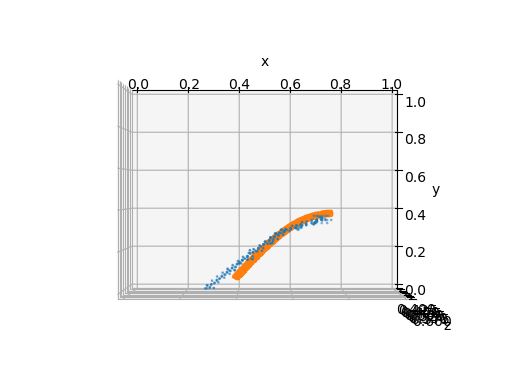

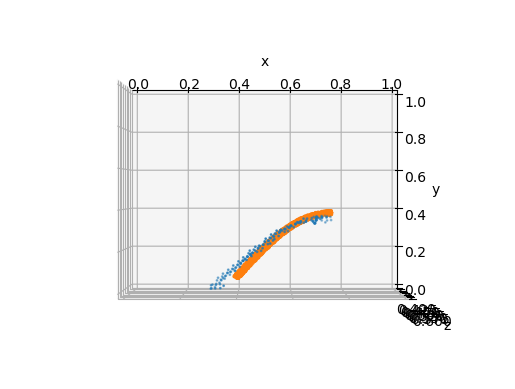

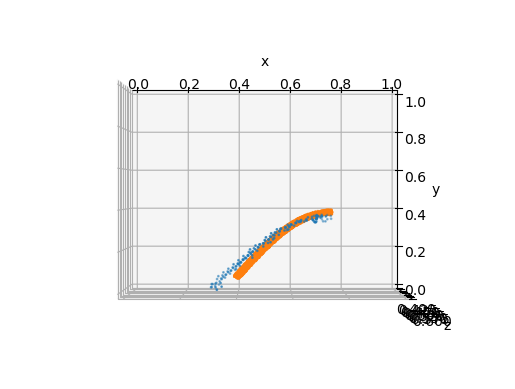

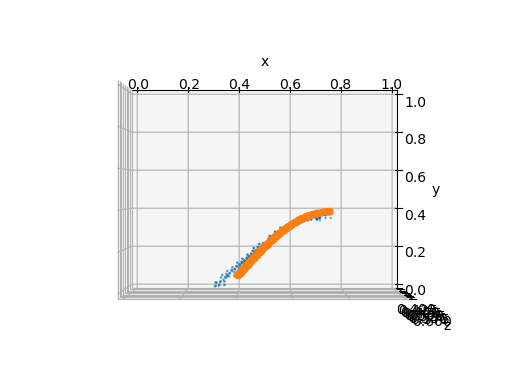

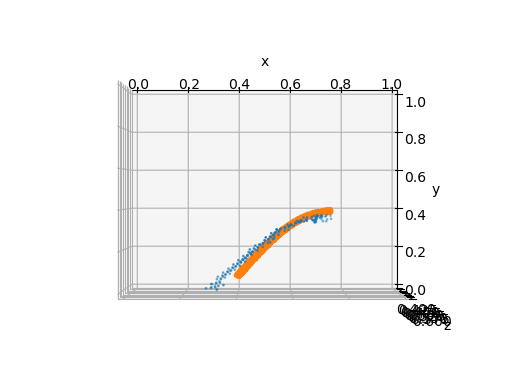

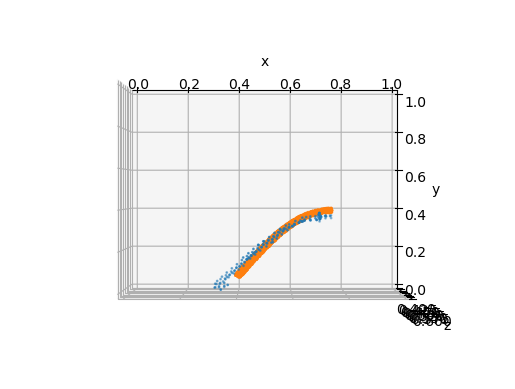

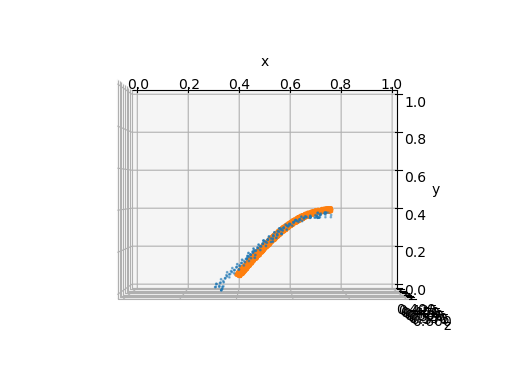

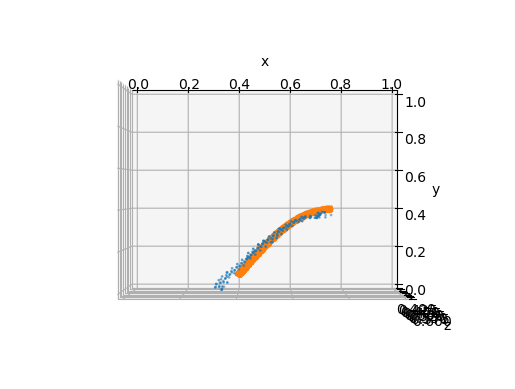

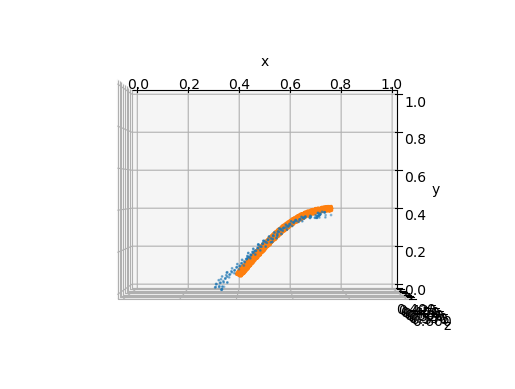

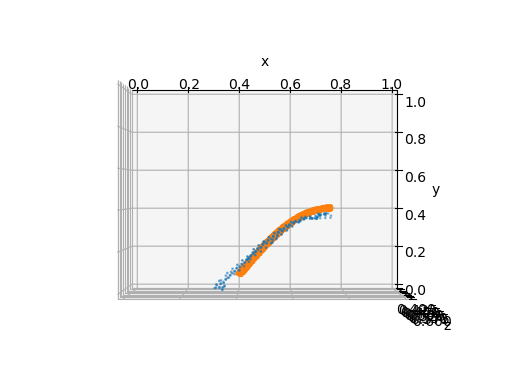

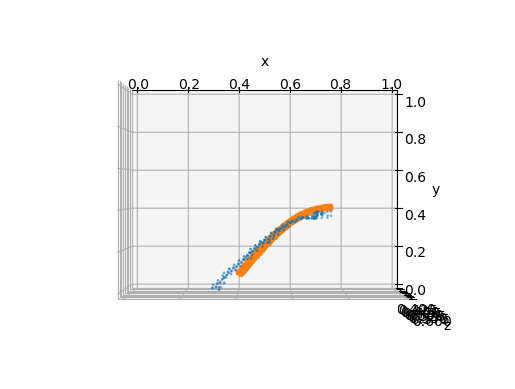

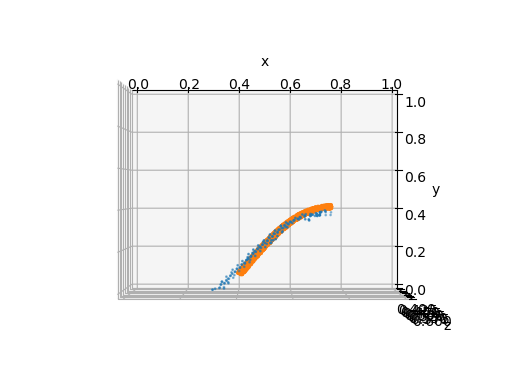

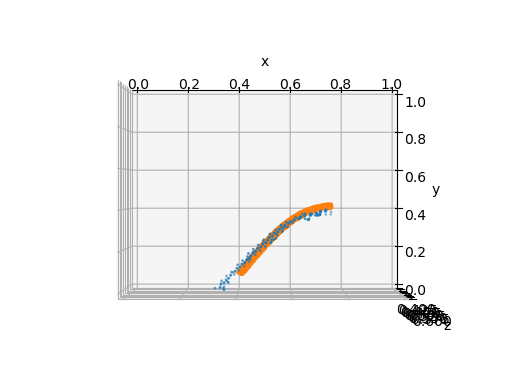

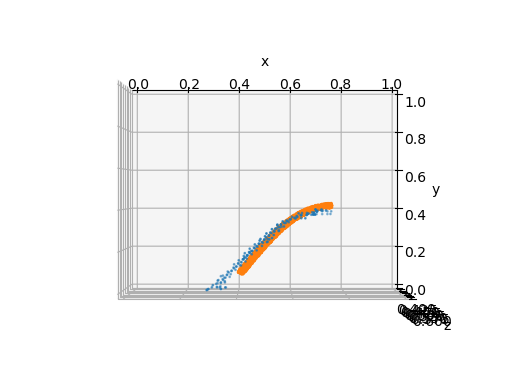

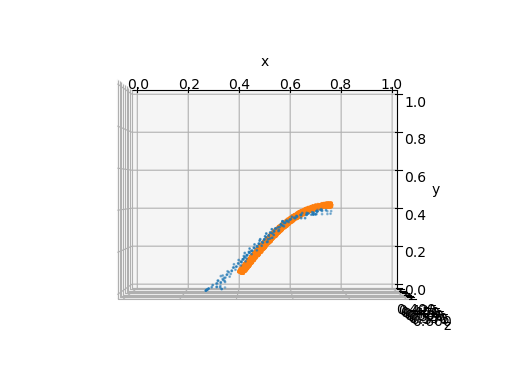

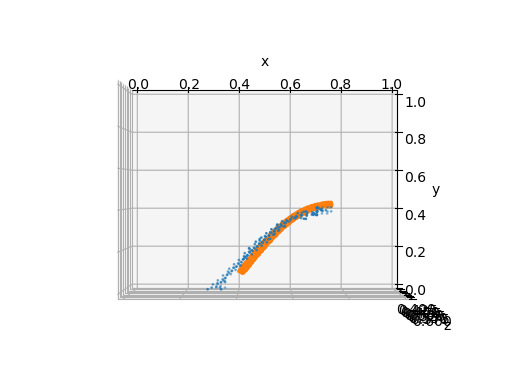

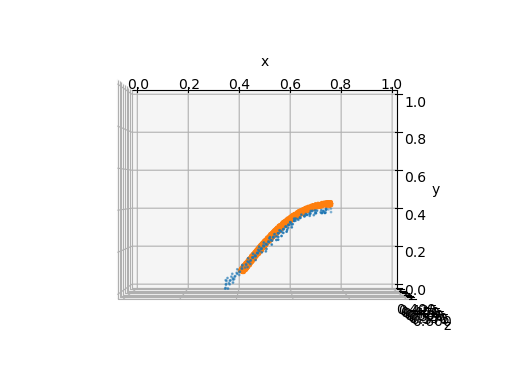

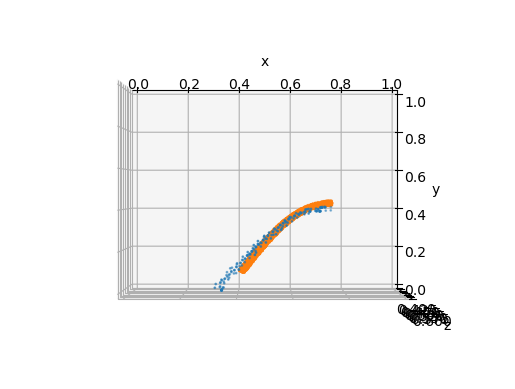

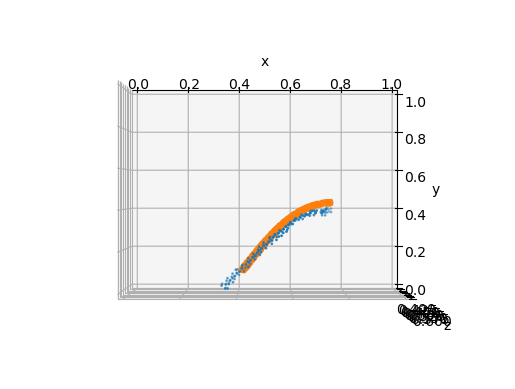

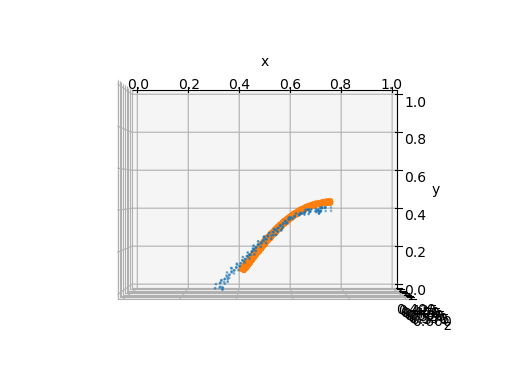

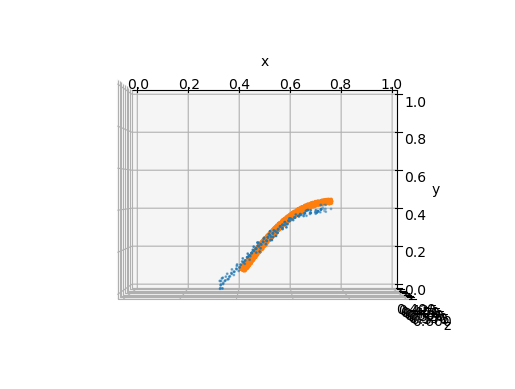

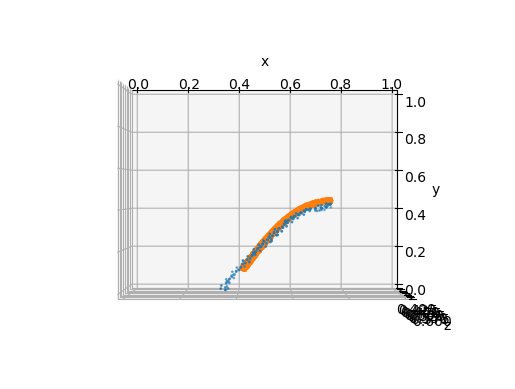

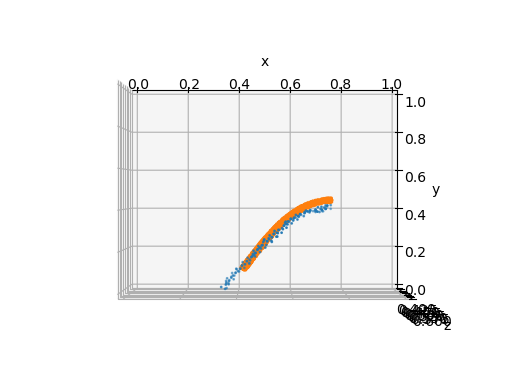

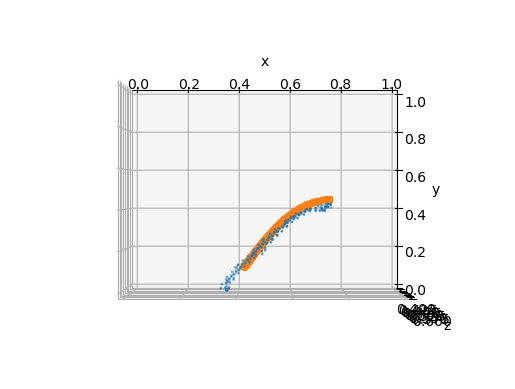

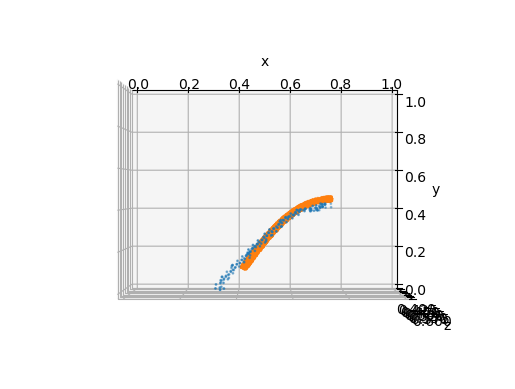

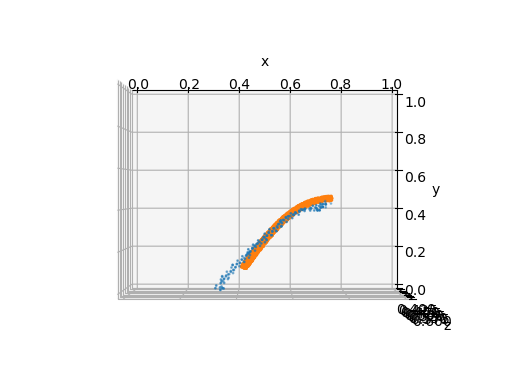

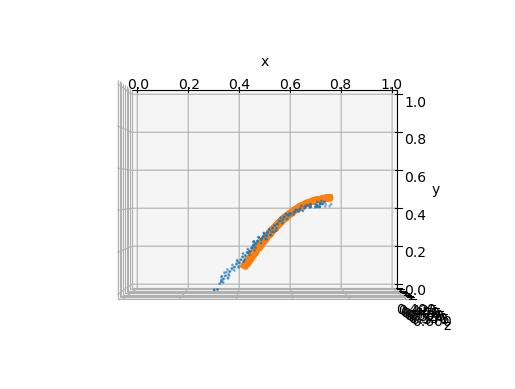

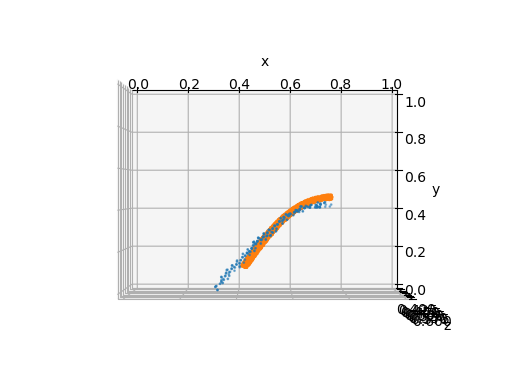

In [13]:
end_index = 150
step = 0

output_pcds = []
for real, sim in zip(pcds[:end_index], pcds_sim[:end_index]):
    real = real[:, [0, 2, 1]]
    # size modify
    real = (real - np.mean(real, axis=0)) * 2 + np.mean(real, axis=0)
    # x modify
    real[:, 0] = 2 - real[:, 0]
    if step == 0:
        real_x_min = np.max(real[:, 0])
        sim_x_min = np.max(sim[:, 0])
        x_diff = real_x_min - sim_x_min
        real[:, 0] -= x_diff
    else:
        real[:, 0] -= x_diff
    # y modify
    if step == 0:
        real_y_min = np.min(real[:, 1])
        real[:, 1] -= real_y_min
    else:
        real[:, 1] -= real_y_min
    # z modify
    real[:, 2] += 0.5
    # cut
    real = real[real[:, 0] > 0.2]
    real = real[real[:, 0] < 0.8]
    real = real[real[:, 2] > 0.4]
    real = real[real[:, 2] < 0.6]
    output_pcds.append(real)
    
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1, projection='3d')
    ax1.scatter(real[:, 0], real[:, 1], real[:, 2], s=1)
    ax1.scatter(sim[:, 0], sim[:, 1], sim[:, 2], s=1)
    ax1.view_init(90, 270)

    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.set_zlim(0.4, 0.6)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
output_pcds = np.array(output_pcds)

In [16]:
output_pcds = np.array(output_pcds)
np.save(f'/root/real2sim/real2sim/real_points/{rope_type}/real_pcds_modify.npy', output_pcds)